<a href="https://colab.research.google.com/github/jagdishmahato/Airbnb-Bookings-Analysis/blob/main/Team_eda_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Airbnb EDA Project by Akash jaiswal,Jagdish Mahato, Kanika Raj and Abhishek Rana**


## **Breakdown of this Notebook:**

1. **Importing Libraries**

2. **Exploring the dataset**

3. **Data Cleaning:**
*   Checking null values.
*   Dropping null values.
*   Dropping few columns.
*   Checking the duplicates and their sum.

4. **Data Analysis and Visualization:** Using plots to find relations between the features

* What is the average preferred price by customers according to the location?

* Number of active hosts per location (Where most of the hosts focused to own  property?)

* Where the customer pays the highest and lowest rent according to location?

* Most popular/demanded host of Airbnb in New York

* Find the total count of each room type

* Room types and their relation with availability in different neighbourhood groups

* Which are the top 25 most used words in listing names?

* Find top 10 hosts with most listings

* Find the top three hosts based on their turnover

* Find total no. of nights spend per location

* Total no. of nights spends per room types

* Top 10 highest listing neighborhood

5. **Types of Visualizations used**: We have used 5 different types of Visualizations i.e.

* Bar Graph  
* Line Graph
* Scattered Graph
* Pie chart
* Box Plotted Graph

#**By Akash Jaiswal**

#Answering following Questions:

* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?</b>

## Importing Neccessary libraries

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)

####Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


####Importing Dataset From Drive

In [ ]:
file_path = '/content/drive/MyDrive/pandas_files/Airbnb_NYC_2019.csv'
airbnb_df=pd.read_csv(file_path)

##Exploring the Dataset

In [ ]:
#Printing the Dataset
pd.DataFrame(airbnb_df)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
#Checking the info of the Dataset
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#Describing the columns
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
#Checking the first five rows
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#Checking the last 5 rows
airbnb_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
#Taking all the columns of the Dataset
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

## ->Cleaning the dataset and rearranging it after removing null values 

In [ ]:
airbnb_df.isnull()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [ ]:
# drop null value from the dataset
airbnb_df.dropna()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


In [ ]:
# after removing last_review , reviews_per_month columns
airbnb_df.drop(['last_review', 'reviews_per_month'], axis = 1,inplace=True)

In [ ]:
#Removing the Duplicates if any
airbnb_df.duplicated().sum()
airbnb_df.drop_duplicates(inplace=True)
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  calculated_host_listings_count  

In [ ]:
airbnb_df.duplicated().sum()

0

###Taking Necessary Columns Only

In [ ]:
#Taken only neccessary columns for better understanding.
new_df = airbnb_df[['id','name','host_id','host_name','neighbourhood_group','neighbourhood','room_type','price','minimum_nights',
             'number_of_reviews','calculated_host_listings_count','availability_365']]
new_df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


##1. What can we learn about different hosts and areas?

In [ ]:
hosting_areas = new_df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
hosting_areas.sort_values(by='calculated_host_listings_count', ascending=False).head(5)


,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,327
1834,Blueground,Manhattan,232
1833,Blueground,Brooklyn,232
7275,Kara,Manhattan,121
7480,Kazuya,Queens,103


##As we can see most number of listings are from **Manhattan** created Sonder (NYC), Blueground, kara, kazuya


##2. What can we learn from predictions? (ex: locations, prices, reviews, etc)

In [ ]:
review_by_areas = new_df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
review_by_areas

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


# Creating a Bar plot with the extracted Data(using matplotlib)

In [ ]:
area = review_by_areas['neighbourhood_group']
review = review_by_areas['number_of_reviews']


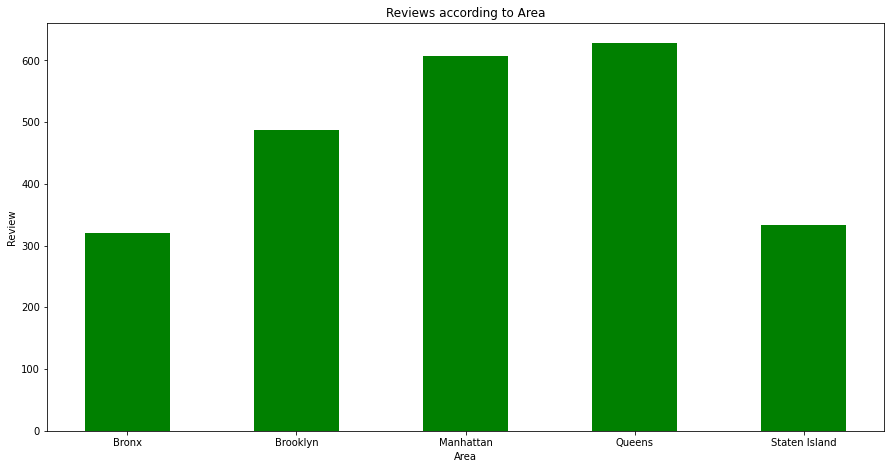

In [ ]:
fig = plt.figure(figsize = (15,7.5))

plt.bar(area, review, color ='green',
        width = 0.5)
 
plt.xlabel("Area")
plt.ylabel("Review")
plt.title("Reviews according to Area")
plt.show()

## The above analysis concludes that most people prefer to stay where number of reviews are more. 
 

##3.Which hosts are the busiest and why?

In [ ]:
busiest_hosts = new_df.groupby(['host_name','host_id','room_type'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
busiest_hosts

,host_name,host_id,room_type,number_of_reviews
10279,Dona,47621202,Private room,629
17708,Jj,4734398,Private room,607
25566,Maya,37312959,Private room,543
6235,Carol,2369681,Private room,540
8947,Danielle,26432133,Private room,510
3950,Asa,12949460,Entire home/apt,488
37748,Wanda,792159,Private room,480
22499,Linda,2680820,Private room,474
8625,Dani,42273,Entire home/apt,467
2942,Angela,23591164,Private room,466


# Creating a Bar plot with the extracted Data(using matplotlib)

In [ ]:
name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']


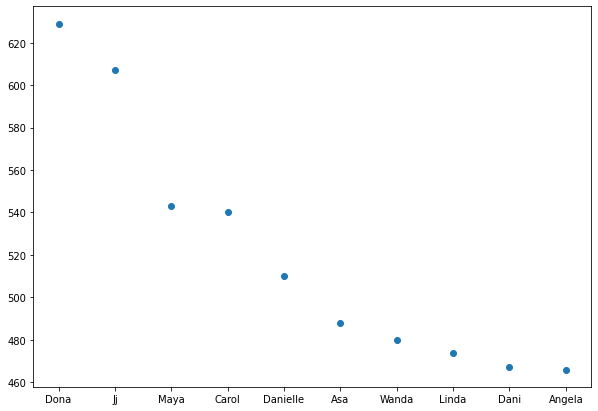

In [ ]:
plt.scatter(name,reviews)
plt.show()

##Most Busiest hosts are:

1. Dona
2. Ji
3. Maya
4. Carol
5. Danielle

###This hosts are the busiest because these hosts listed entire and private rooms which is prefered by most of the people.

#**By Jagdish Mahato**

#Answering following Questions:
* Is there any noticeable difference of traffic among different areas and what could be the reason for it?
* Finding Relation between neighbourhood group and availability of rooms.
* Finding Top 10 Listing Counts. </b>

## Importing Neccessary libraries

In [56]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)

####Mounting Google Drive

In [57]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


####Importing Dataset From Drive

In [58]:
file_path = '/content/drive/MyDrive/EDA_Project_Jagdish/Airbnb_NYC_2019.csv'
airbnb_df=pd.read_csv(file_path)

##Exploring the Dataset

In [59]:
#Printing the Dataset
pd.DataFrame(airbnb_df)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [60]:
#Checking the info of the Dataset
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [61]:
#Describing the columns
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [62]:
#Checking the first five rows
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [63]:
#Checking the last 5 rows
airbnb_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [64]:
#Taking all the columns of the Dataset
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

## ->Cleaning the dataset and rearranging it after removing null values 

In [65]:
#Checking null values()
airbnb_df.isnull()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [66]:
# drop null value from the dataset
airbnb_df.dropna()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


In [67]:
# after removing last_review , reviews_per_month columns
airbnb_df.drop(['last_review', 'reviews_per_month'], axis = 1,inplace=True)

In [68]:
#Removing the Duplicates if any
airbnb_df.duplicated().sum()
airbnb_df.drop_duplicates(inplace=True)
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  calculated_host_listings_count  

In [69]:
#Checking the sum of duplicates
airbnb_df.duplicated().sum()

0

###Taking Necessary Columns Only

In [70]:
#Taken only neccessary columns for better understanding.
new_df = airbnb_df[['id','name','host_id','host_name','neighbourhood_group','neighbourhood','room_type','price','minimum_nights',
             'number_of_reviews','calculated_host_listings_count','availability_365']]
new_df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


##1. Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [84]:
traffic_in_different_areas = new_df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
traffic_in_different_areas = traffic_in_different_areas.sort_values(by='minimum_nights', ascending=False)
traffic_in_different_areas

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


# Creating a Bar plot with the extracted Data(using matplotlib)

In [85]:
room_type = traffic_in_different_areas['room_type']
stayed = traffic_in_different_areas['minimum_nights']


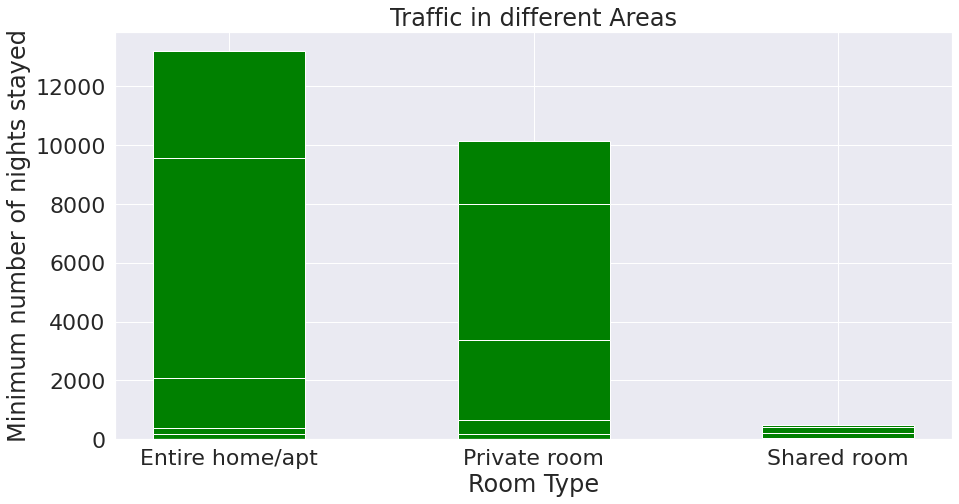

In [86]:
fig = plt.figure(figsize = (15, 7.5))
 
plt.bar(room_type, stayed, color ='green',
        width = 0.5)

plt.xlabel("Room Type")
plt.ylabel("Minimum number of nights stayed")
plt.title("Traffic in different Areas")
plt.show()

#2. Finding Relation between neighbourhood group and availability of rooms

[Text(0, 0, 'Brooklyn'),
 Text(0, 0, 'Manhattan'),
 Text(0, 0, 'Queens'),
 Text(0, 0, 'Staten Island'),
 Text(0, 0, 'Bronx')]

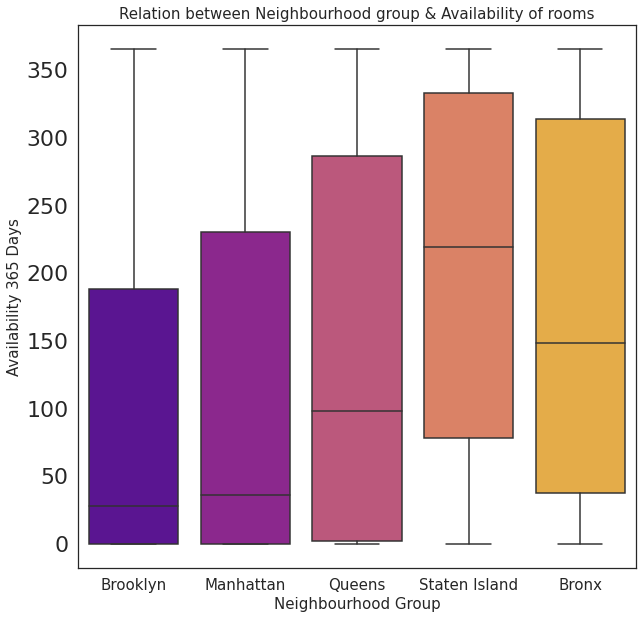

In [87]:
plt.figure(figsize=(10,10))
sns.set_style('white')

ax = sns.boxplot(data=new_df, x='neighbourhood_group',y='availability_365',palette='plasma')

# Naming the Chart
ax.set_title('Relation between Neighbourhood group & Availability of rooms').set_fontsize('15')

# Naming X & Y axis
ax.set_ylabel('Availability 365 Days').set_fontsize('15')
ax.set_xlabel('Neighbourhood Group').set_fontsize('15')

#Adjusting Bar labels
ax.set_xticklabels(ax.get_xticklabels(), size = '15')

##3. Finding Top 10 Listing Counts

In [92]:
new_df['host_id'].count()

48895

In [89]:
#Creating DataFrame
count_host_id = list(new_df['host_id'].value_counts())
host_id = list(new_df.host_id)
listing_count= list(zip(host_id,count_host_id))
count_host_id_df= pd.DataFrame(listing_count)
count_host_id_df.rename(columns={0:'Host_Id',1:'Counts'},inplace=True)

#Storing top 10 hosts with most listings
top_host_id = count_host_id_df.head(10)
top_host_id

,Host_Id,Counts
0,2787,327
1,2845,232
2,4632,121
3,4869,103
4,7192,96
5,7322,96
6,7356,91
7,8967,87
8,7490,65
9,7549,52


[Text(0, 0, '2787'),
 Text(0, 0, '2845'),
 Text(0, 0, '4632'),
 Text(0, 0, '4869'),
 Text(0, 0, '7192'),
 Text(0, 0, '7322'),
 Text(0, 0, '7356'),
 Text(0, 0, '8967'),
 Text(0, 0, '7490'),
 Text(0, 0, '7549')]

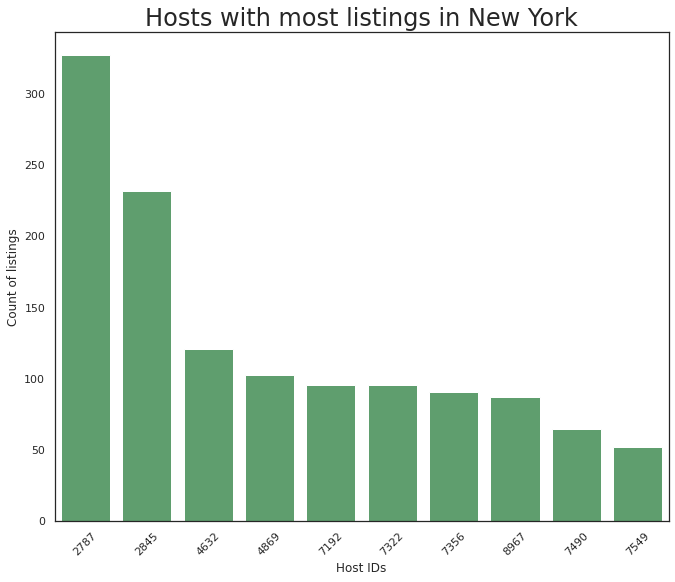

In [90]:
#Setting the figure size
sns.set(rc={'figure.figsize':(11,9)})

#Setting background colour of chart as white
sns.set_style('white')

#Plotting the Chart
viz_bar = sns.barplot(x= 'Host_Id', y= 'Counts', color='g', data=top_host_id,
                      order=top_host_id.sort_values('Counts',ascending = False).Host_Id)

#Setting font size for title
sns.set(font_scale = 2)

# Naming the Chart
viz_bar.set_title('Hosts with most listings in New York')

# Naming X & Y axis
viz_bar.set_xlabel('Host IDs')
viz_bar.set_ylabel('Count of listings')

#Adjusting Bar labels
viz_bar.set_xticklabels(viz_bar.get_xticklabels(), rotation=45)


# **By Kanika Raj**

#Answering following Questions:
* Find total no. nights spend per location.
* Total no. of nights spend per room types.
* Top ten Highest listing neighourhood. </b>

## Importing Neccessary libraries

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#plt.rcParams['figure.figsize'] = (10, 7)

####Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


####Importing Dataset From Drive

In [ ]:
file_path = '/content/drive/MyDrive/pandas_files/Airbnb_NYC_2019.csv'
airbnb_df=pd.read_csv(file_path)

##Exploring the Dataset

In [ ]:
#Printing the Dataset
pd.DataFrame(airbnb_df)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
#Checking the info of the Dataset
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#Getting advanced info of the Dataset
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
#Checking the first five rows
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#Checking the last 5 rows
airbnb_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
#Taking all the columns of the Dataset
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

## ->Cleaning the dataset and rearranging it after removing null values 

In [ ]:
#Checking null values()
airbnb_df.isnull()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [ ]:
# drop null value from the dataset
airbnb_null_file = airbnb_df.dropna()

In [ ]:
# after removing last_review , reviews_per_month columns
airbnb_df.drop(['last_review', 'reviews_per_month'], axis = 1,inplace=True)

In [ ]:
#Removing the Duplicates if any
airbnb_df.duplicated().sum()
airbnb_df.drop_duplicates(inplace=True)
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  calculated_host_listings_count  

In [ ]:
#Checking the sum of duplicates
airbnb_df.duplicated().sum()

0

In [ ]:
#Assigning to new variable
new_df=airbnb_null_file.copy()
new_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


#1.Find total no. nights spend per location

In [ ]:
#find the maximum(minimum nights) spending by customer across different neighourhood group
total_nights=new_df.groupby('neighbourhood_group')['minimum_nights'].sum().reset_index().rename(columns={'neighbourhood_group':'Location','minimum_nights':'Total_No._Nights'})
location_nights=total_nights.sort_values('Total_No._Nights',ascending=False)
location_nights.head()

,Location,Total_No._Nights
2,Manhattan,116571
1,Brooklyn,87458
3,Queens,19305
0,Bronx,3441
4,Staten Island,1074


In [ ]:
labels=list(location_nights['Location'])
sizes=list(location_nights['Total_No._Nights'])
print(labels,sizes)

['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'] [116571, 87458, 19305, 3441, 1074]


[Text(0, 0, 'Manhattan'),
 Text(0, 0, 'Brooklyn'),
 Text(0, 0, 'Queens'),
 Text(0, 0, 'Bronx'),
 Text(0, 0, 'Staten Island')]

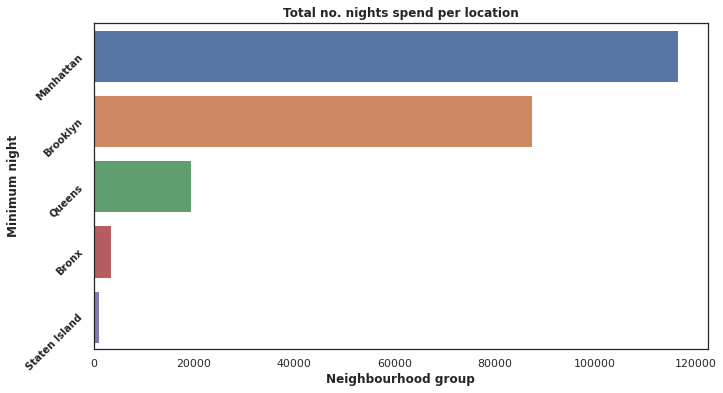

In [ ]:
sns.set(rc={'figure.figsize':(11,6)})
sns.set_style('white')
abc= sns.barplot(x='Total_No._Nights',y='Location',data = location_nights)
abc.set_title('Total no. nights spend per location', Weight='bold')
abc.set_ylabel('Minimum night', Weight='bold')
abc.set_xlabel('Neighbourhood group', Weight='bold')

abc.set_yticklabels(abc.get_yticklabels(),Weight='bold',rotation = 45,size='10')

**The above analysis shows that the total no. of nights spend per location.**

#2. Total no. of nights spend per room types

In [ ]:
# find unique value of room types
airbnb_room_type=list(new_df['room_type'].unique())
airbnb_room_type

['Private room', 'Entire home/apt', 'Shared room']

In [ ]:
#  find the maximum(minimum nights) spending by customer across different room type
total_room=new_df.groupby(  'room_type')['minimum_nights'].sum().reset_index()
room_nights_df=total_room.sort_values('minimum_nights',ascending=True)
room_nights_df.head()

,room_type,minimum_nights
2,Shared room,3721
1,Private room,80160
0,Entire home/apt,143968


In [ ]:
# create dataset
labels=list(room_nights_df['room_type'])
sizes=list(room_nights_df['minimum_nights'])
print(labels,sizes)


['Shared room', 'Private room', 'Entire home/apt'] [3721, 80160, 143968]


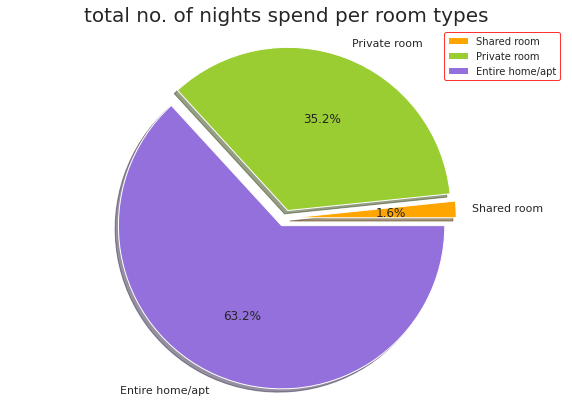

In [ ]:
#creating pie chart
plt.rcParams['figure.figsize'] = (10, 7)
# create explode
explode = (0.05, 0.05, 0.05)
# create color parameter
colors=['Orange','YellowGreen','mediumpurple']
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True)
plt.title('total no. of nights spend per room types', fontsize=20)
plt.axis("equal")  
plt.legend(loc='upper right',fontsize='small',edgecolor='red')
plt.show()

**The above analysis shows that the number of nights spend per room type.**

#3. Top ten Highest listing neighourhood

In [ ]:
# find listing value of all neighourhood in dataset
neighour=new_df['neighbourhood'].value_counts().sort_values(ascending=False).reset_index()
#top ten neighourhood with listing value
top_10=neighour[:10]
top_10

#m.rename(columns={'index': 'newName1', 'neighourhood': 'newName2'}, inplace=True)

,index,neighbourhood
0,Williamsburg,3163
1,Bedford-Stuyvesant,3141
2,Harlem,2204
3,Bushwick,1942
4,Hell's Kitchen,1528
5,East Village,1489
6,Upper West Side,1482
7,Upper East Side,1405
8,Crown Heights,1265
9,Midtown,986


In [ ]:
#make copy of top_10
final_10=top_10.copy()
#rename that dataframe
final_10.rename(columns={'index':'neighourhood','neighbourhood':'listing_value' },inplace=True)

final_10

,neighourhood,listing_value
0,Williamsburg,3163
1,Bedford-Stuyvesant,3141
2,Harlem,2204
3,Bushwick,1942
4,Hell's Kitchen,1528
5,East Village,1489
6,Upper West Side,1482
7,Upper East Side,1405
8,Crown Heights,1265
9,Midtown,986


[Text(0, 0, 'Williamsburg'),
 Text(0, 0, 'Bedford-Stuyvesant'),
 Text(0, 0, 'Harlem'),
 Text(0, 0, 'Bushwick'),
 Text(0, 0, "Hell's Kitchen"),
 Text(0, 0, 'East Village'),
 Text(0, 0, 'Upper West Side'),
 Text(0, 0, 'Upper East Side'),
 Text(0, 0, 'Crown Heights'),
 Text(0, 0, 'Midtown')]

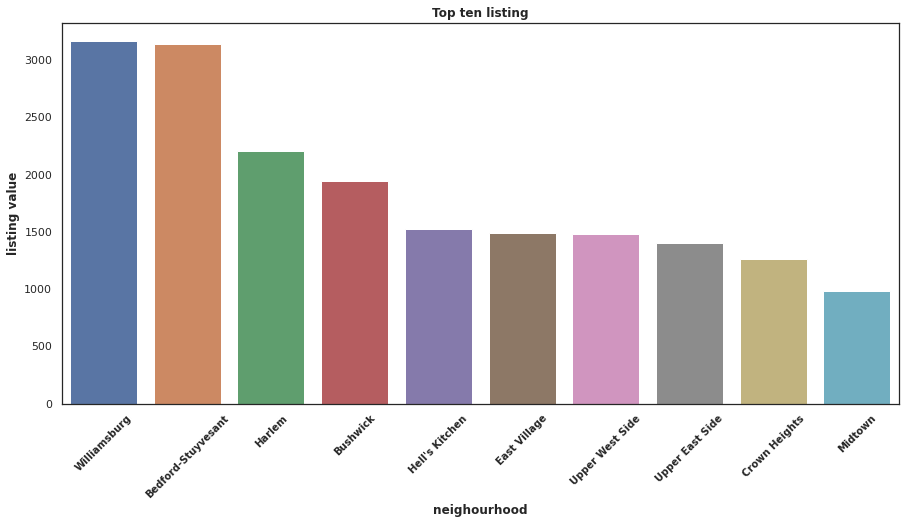

In [ ]:
# data visualizing with barplot using seaborn
sns.set(rc={'figure.figsize':(15,7)})
sns.set_style('white')
#Plotting the Chart
abc= sns.barplot(x='neighourhood', y='listing_value',data = final_10)
abc.set_title('Top ten listing', Weight='bold')
# Naming X & Y axis
abc.set_ylabel('listing value', Weight='bold')
abc.set_xlabel('neighourhood', Weight='bold')
#Adjusting Bar labels

abc.set_xticklabels(abc.get_xticklabels(),Weight='bold',rotation = 45,size='10')

**The above analysis shows that the which neighbourhood are in the top 10 list.**

# **By Abhishek Rana**

#Answering following Questions:
* Finding Total count of each room types.
* What is the average preferred price by customers according to the location?
* Which is the most preferred place by hosts to do their business. </b>

## Importing Neccessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

####Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


####Importing Dataset From Drive

In [ ]:
file_path = '/content/drive/MyDrive/pandas_files/Airbnb_NYC_2019.csv'
airbnb_df=pd.read_csv(file_path)

##Exploring the Dataset

In [ ]:
#Printing the Dataset
pd.DataFrame(airbnb_df)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
#Checking the info of the Dataset
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#Getting advanced info of the Dataset
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
#Checking the first five rows
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#Checking the last 5 rows
airbnb_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
#Taking all the columns of the Dataset
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

## ->Cleaning the dataset and rearranging it after removing null values 

In [ ]:
#Checking null values()
airbnb_df.isnull()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [ ]:
# drop null value from the dataset
non_null_file = airbnb_df.dropna()

In [ ]:
# after removing last_review , reviews_per_month columns
airbnb_df.drop(['last_review', 'reviews_per_month'], axis = 1,inplace=True)

In [ ]:
#Removing the Duplicates if any
airbnb_df.duplicated().sum()
airbnb_df.drop_duplicates(inplace=True)
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  calculated_host_listings_count  

In [ ]:
#Checking the sum of duplicates
airbnb_df.duplicated().sum()

0

###1. Finding Total count of each room types

In [ ]:
# Finding unique values from column 'room_type'
airbnb_room_type = airbnb_df.room_type.unique()

In [ ]:
# Which is the most listed room type?
airbnb_roomtype_frequency = list(airbnb_df.room_type.value_counts())

In [ ]:
#Visualizing & customizing the pie-chart
mylabels= ["Private Room","Entire Home/Apt","Shared Room"]
mycolors = ["green", "red", "yellow"]
myexplode = (0.07, 0.0, 0.0)

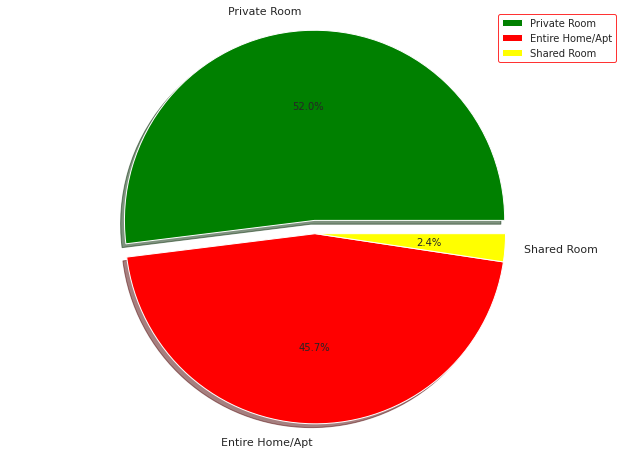

In [ ]:
fig = plt.figure(figsize =(11, 8))
plt.pie(airbnb_roomtype_frequency,labels = mylabels,colors=mycolors,explode = myexplode,autopct='%1.1f%%', shadow = True)
plt.axis("equal")  
plt.legend(loc='upper right',fontsize='medium',edgecolor='red')
#plt.legend(title="Room Types:")
plt.show()

#2.What is the average preferred price by customers according to the location?

In [ ]:
#Average_price of property according to the location
avg_preffered_price_df = airbnb_df.groupby(['neighbourhood_group','room_type'], as_index=False)['price'].mean().rename(columns={'neighbourhood_group':'Location','price':'Average Price'})
avg_preffered_price_df

,Location,room_type,Average Price
0,Bronx,Entire home/apt,127.506596
1,Bronx,Private room,66.788344
2,Bronx,Shared room,59.800000
3,Brooklyn,Entire home/apt,178.327545
4,Brooklyn,Private room,76.500099
5,Brooklyn,Shared room,50.527845
6,Manhattan,Entire home/apt,249.239109
7,Manhattan,Private room,116.776622
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


In [ ]:
#Unstack the group by information for plotting the graph
avg_preffered_price_df = airbnb_df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
avg_preffered_price_df

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


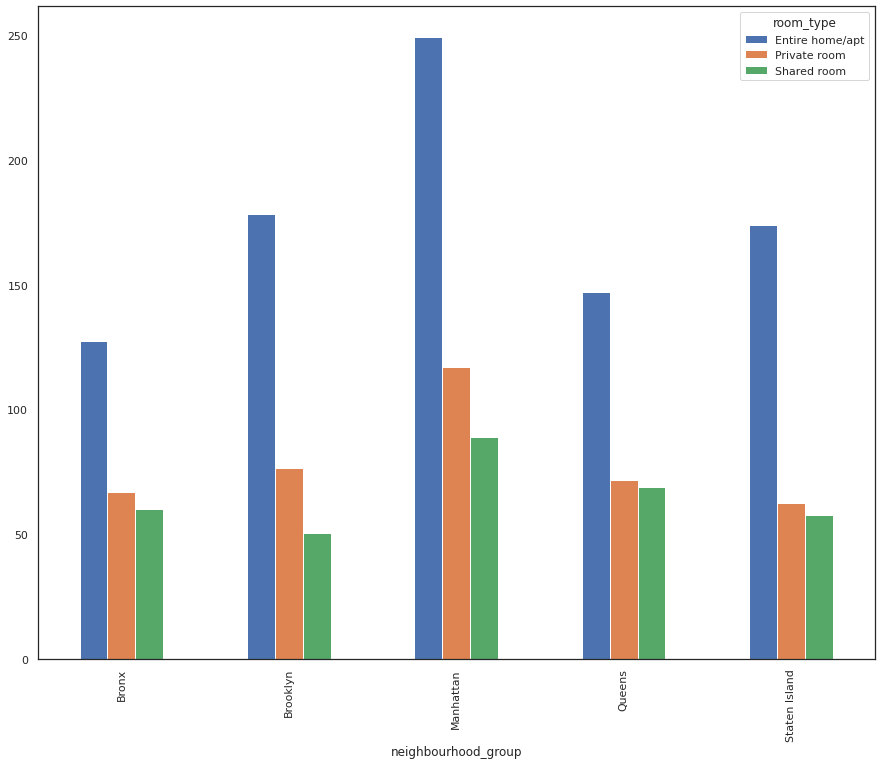

In [ ]:
#Graph of average price of property according to location

avg_preffered_price_df.plot.bar(figsize=(15,12))


#3. Which is the most preferred place by hosts to do their business.

In [ ]:
#Apply group by operation on neighbourhood_group for find the number of host according to location
no_of_host_per_location = airbnb_df.groupby('neighbourhood_group',as_index=False)['host_id'].count().sort_values(['host_id'], ascending=False).rename(columns={'neighbourhood_group':'Location','host_id':'Host'})
no_of_host_per_location

,Location,Host
2,Manhattan,21661
1,Brooklyn,20104
3,Queens,5666
0,Bronx,1091
4,Staten Island,373


In [ ]:
#Take a simple format of above question without index for plot the line chart
no_of_host_per_location = airbnb_df.groupby('neighbourhood_group')['host_id'].count()
no_of_host_per_location

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: host_id, dtype: int64

Text(0.5, 0, 'Location')

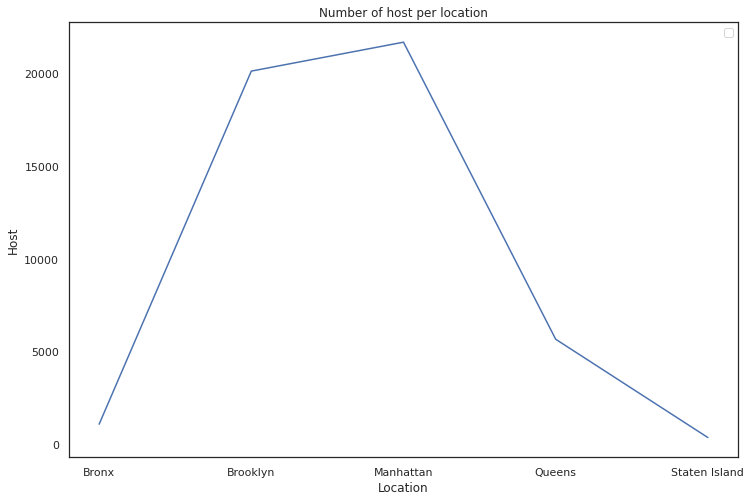

In [ ]:
#Graph
fig = plt.figure(figsize =(12, 8))
plt.legend(labels = ['No. of Host'])
plt.plot(no_of_host_per_location)
plt.title('Number of host per location')
plt.ylabel('Host')
plt.xlabel('Location')


##->From the above analysis we can conclude that people prefer entire home or private rooms and listings which are less in price.

### Entire home/apt or Private rooms are mostly present in Manhattan, Brooklyn, Queens.

##What's factors makes Airbnb successful-:
### ->Any service provider is successful if it has.
### ->A high average user ratings.
### ->Focus on User Experience.
### ->A good number of positive reviews.
### ->A good number of monthly average users.
### ->High revenue per customer and so on.

# Analysis summary
###1. The people who prefer to stay in Entire home or  Apartment they are going to stay bit longer in that particular Neighbourhood only.


###2. The people who prefer to stay in Private room they won't stay longer as compared to Home or Apartment.


###3. Most people prefer to pay less price.

###4. If there are more number of Reviews for particular Neighbourhood group that means that place is a tourist place.

###5. If people are not staying more then one night means they are travellers



# Conclusion
###</b>From this EDA project, the following concepts were learnt:
###* Basic inspection of the raw data.
###* Handing the duplicate, error and NaN values present in the dataset, ie, cleaning the data.
###* Using different Python functions and libraries to clean and manipulate data.
###* Data wrangling to come up with different insights on the data.
###* Designing multiple visualizations to summarize the information in the dataset and successfully communicate the results and trends to the reader.</b>

###</b>Different Python libraries used to complete this EDA:
###* Pandas
###* NumPy
###* Matplotlib.Pyplot </b>




---


#Thanks 


